Accuracy 1 : 0.9502923976608187
AUC 1 :  0.9915165165165165


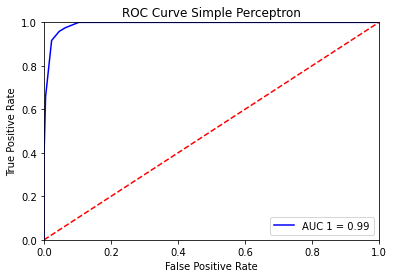

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV


#Traitement du fichier .mat
cancercell = sp.loadmat('breastw.mat')
X = cancercell['X']
y = cancercell['y']
#print(cancercell)
y=np.reshape(y,(683,))
#Séparation des données d'apprentissage et des données tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
#fin traitement mat

PP = Perceptron() #random_state=42
PP.fit(X_train, y_train)
predictions_test = PP.predict(X_test)

#Accuracy
result1 = accuracy_score(y_test,predictions_test)
print("Accuracy 1 :",result1)

#ROC curve
clf_isotonic = CalibratedClassifierCV(PP, cv='prefit', method='isotonic') #il faut encore fait la validation croisée au début (équilibrer notre dataset)
clf_isotonic.fit(X_test, y_test)
preds = clf_isotonic.predict_proba(X_test)

#y_scores1 = PP.predict_proba(X_test) #il ne connaît pas predict_proba
fpr, tpr, threshold = roc_curve(y_test, preds[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC 1 : ", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC 1 = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Simple Perceptron')
plt.show()